In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("train.csv")

In [60]:
df.shape

(820, 15)

In [61]:
df.describe()

,age,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,ID
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,54.614634,132.348780,247.934146,0.153659,0.514634,149.378049,0.340244,1.077927,1.373171,0.745122,2.340244,0.513415,507.786585
std,9.105019,17.966807,51.456188,0.360841,0.523938,22.592931,0.474080,1.180970,0.624890,1.022178,0.605300,0.500125,296.924874
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,252.750000
50%,56.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,502.500000
75%,61.000000,140.000000,281.250000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000,769.250000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1023.000000


In [62]:
df.columns

Index(['age', 'Gender', 'chest_pain_type', 'blood_pressure_level',
       'cholesterol_level', 'blood_sugar', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'Heart_Disease', 'ID'],
      dtype='object')

In [63]:
df.isnull().sum()

age                     0
Gender                  0
chest_pain_type         0
blood_pressure_level    0
cholesterol_level       0
blood_sugar             0
restecg                 0
thalach                 0
exang                   0
oldpeak                 0
slope                   0
ca                      0
thal                    0
Heart_Disease           0
ID                      0
dtype: int64

In [64]:
df.head()

,age,Gender,chest_pain_type,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease,ID
0,62,Female,Asymptomatic,138,294,1,1,106,0,1.9,1,3,2,0,4
1,56,Female,Asymptomatic,200,288,1,0,133,1,4.0,0,2,3,0,688
2,57,Male,Non-anginal Pain,128,229,0,0,150,0,0.4,1,1,3,0,477
3,57,Male,Non-anginal Pain,150,126,1,1,173,0,0.2,2,1,3,1,336
4,52,Female,Non-anginal Pain,136,196,0,0,169,0,0.1,1,0,2,1,960


In [65]:
df.dtypes

age                       int64
Gender                   object
chest_pain_type          object
blood_pressure_level      int64
cholesterol_level         int64
blood_sugar               int64
restecg                   int64
thalach                   int64
exang                     int64
oldpeak                 float64
slope                     int64
ca                        int64
thal                      int64
Heart_Disease             int64
ID                        int64
dtype: object

In [66]:
#categorical columns (object, category, bool)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Numerical columns(int,float)
num_cols = ['blood_pressure_level','blood_sugar','restecg','thalach',
            'exang','oldpeak','slope','ca','thal']

In [67]:
cat_cols

['Gender', 'chest_pain_type']

In [68]:
df['Gender'].value_counts()
# 1:male, 0:female

Gender
Male      570
Female    250
Name: count, dtype: int64

In [69]:
df['chest_pain_type'].value_counts()


chest_pain_type
Asymptomatic        398
Non-anginal Pain    218
Atypical Angina     143
Typical Angina       61
Name: count, dtype: int64

In [70]:
#check what value is assigned to which category
category_to_encoded = {category: i for i, category in enumerate(le.classes_)}
print(category_to_encoded)

{'Asymptomatic': 0, 'Atypical Angina': 1, 'Non-anginal Pain': 2, 'Typical Angina': 3}


In [71]:
df['ca'].value_counts()

ca
0    466
1    178
2    107
3     57
4     12
Name: count, dtype: int64

In [72]:
num_cols

['blood_pressure_level',
 'blood_sugar',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [73]:
# we wont be needing id to make predictions
df = df.drop('ID', axis=1)

# LABEL ENCODING

In [74]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [75]:
#label encoding 
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le    



In [76]:
df.head()

,age,Gender,chest_pain_type,blood_pressure_level,cholesterol_level,blood_sugar,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
0,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
1,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
2,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
3,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
4,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1


# VISUALISATION


CATEGORICAL COLUMNS

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/188491639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"], order=order,palette='Set1')


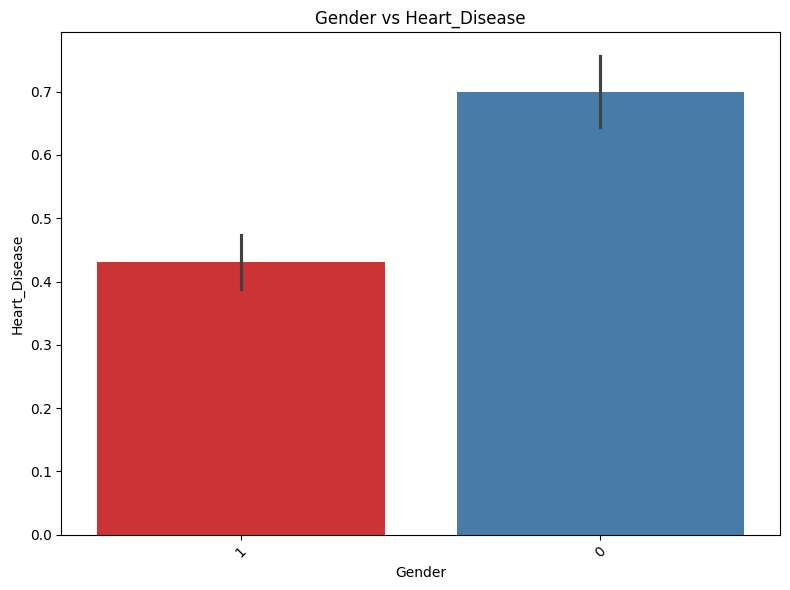

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/188491639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"], order=order,palette='Set1')


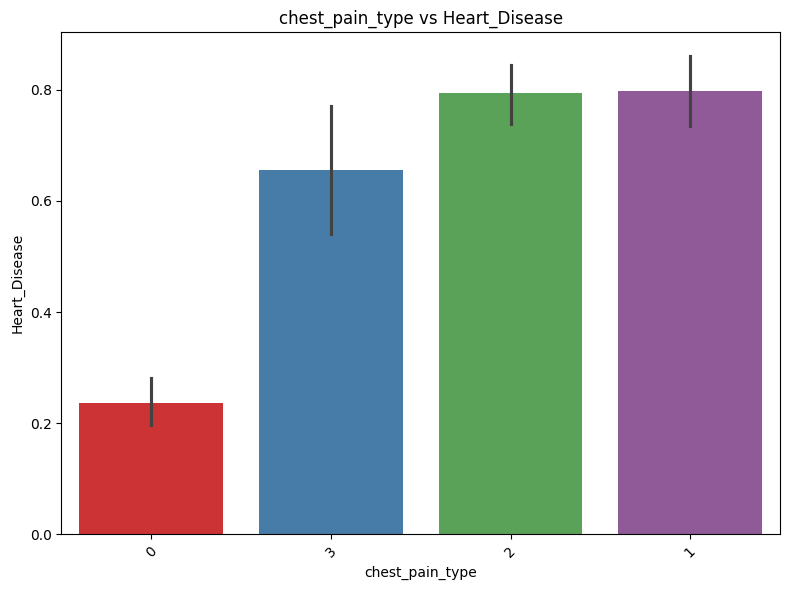

In [77]:
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    order = df.groupby(col)['Heart_Disease'].mean().sort_values().index
    sns.barplot(x=df[col], y=df["Heart_Disease"], order=order,palette='Set1')
    plt.title(f'{col} vs Heart_Disease')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



NUMERICAL COLUMNS

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/3626188247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)


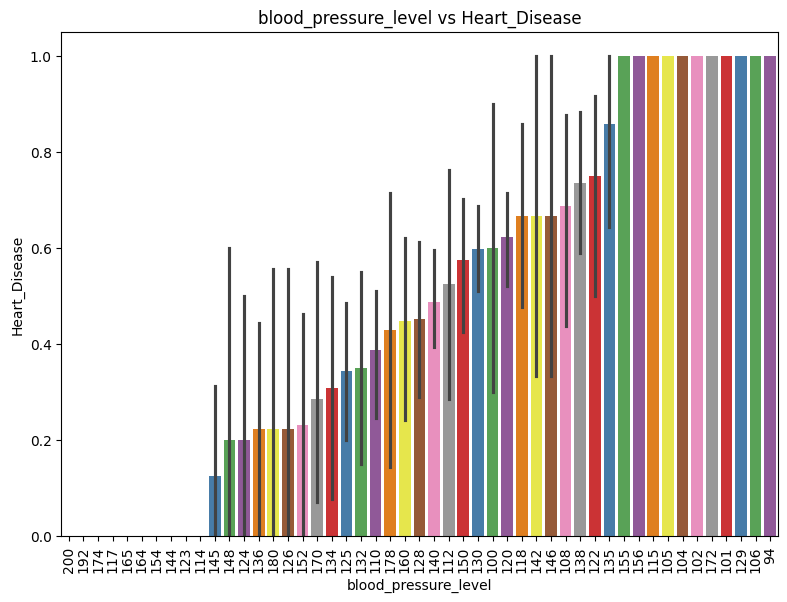

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/3626188247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)


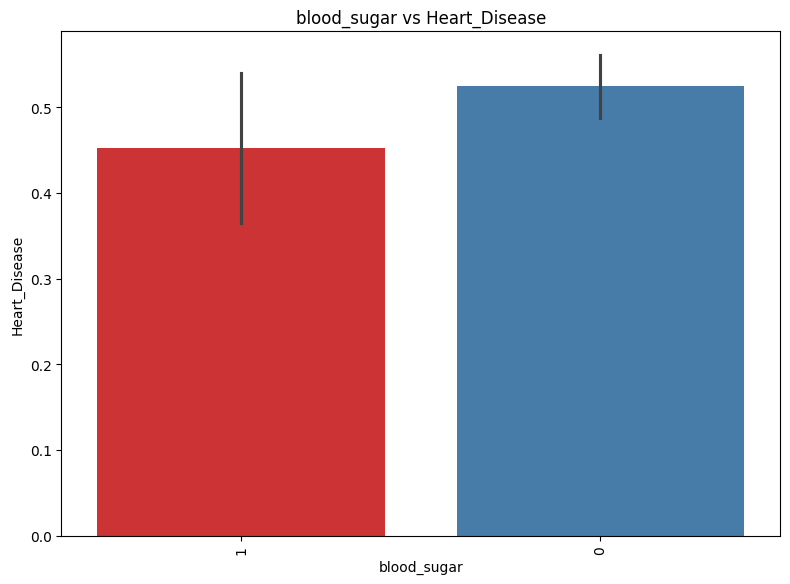

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/3626188247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)


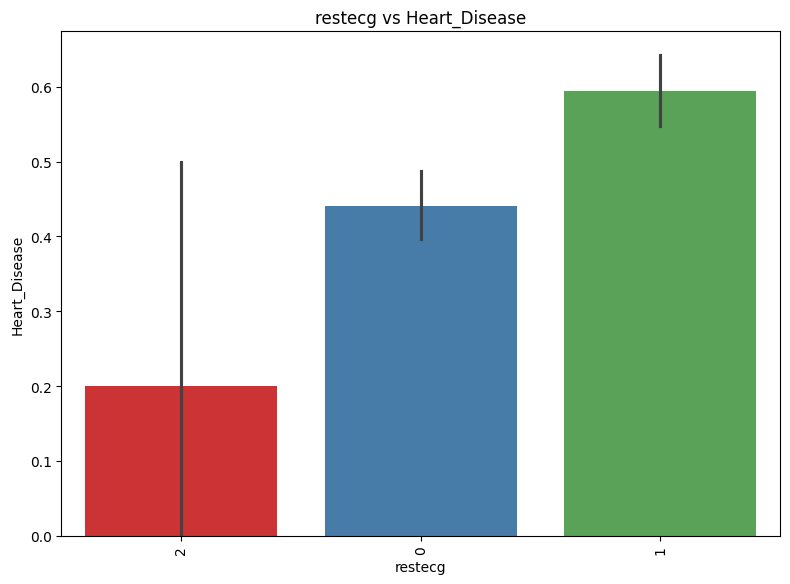

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/3626188247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)


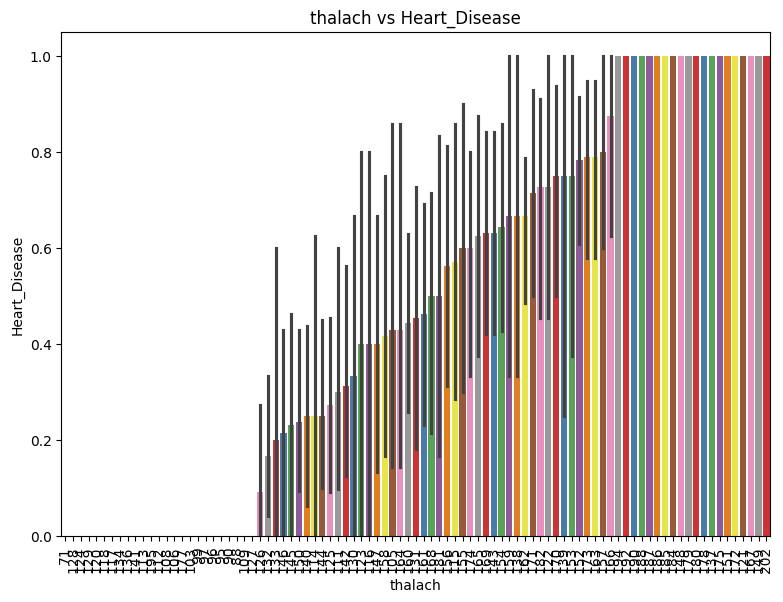

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/3626188247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)


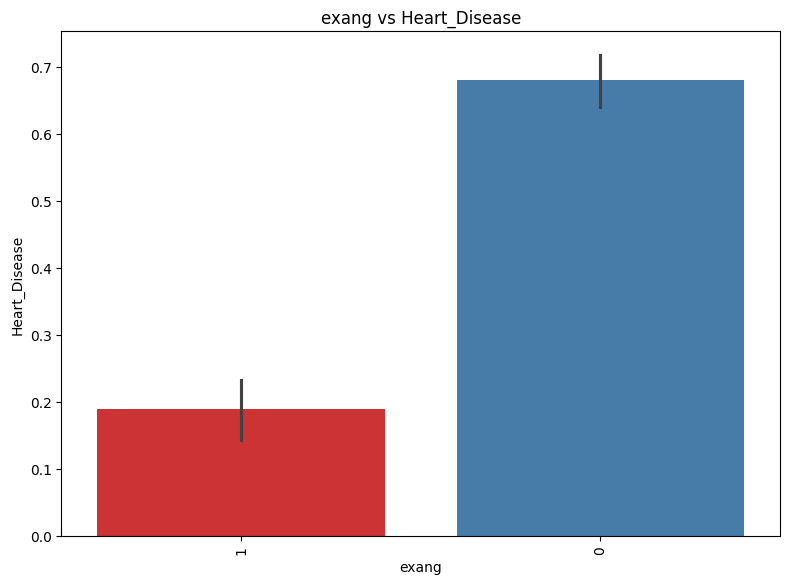

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/3626188247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)


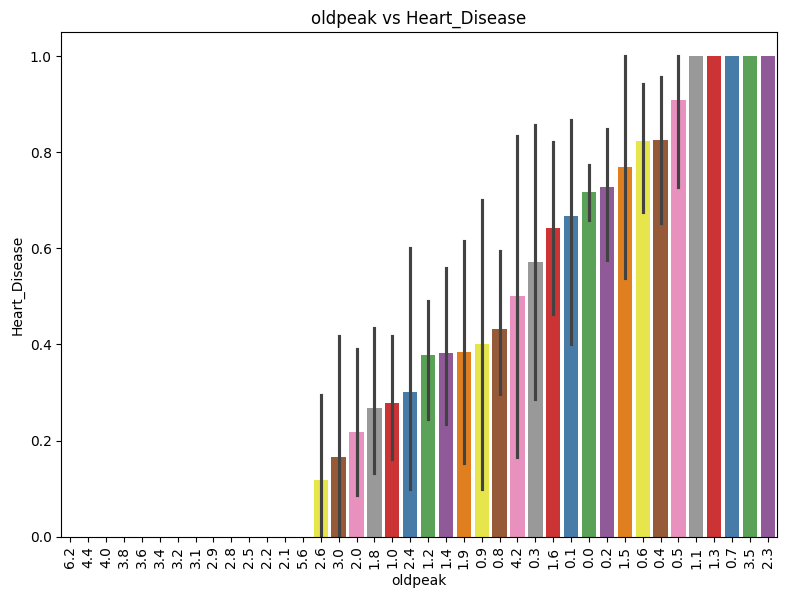

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/3626188247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)


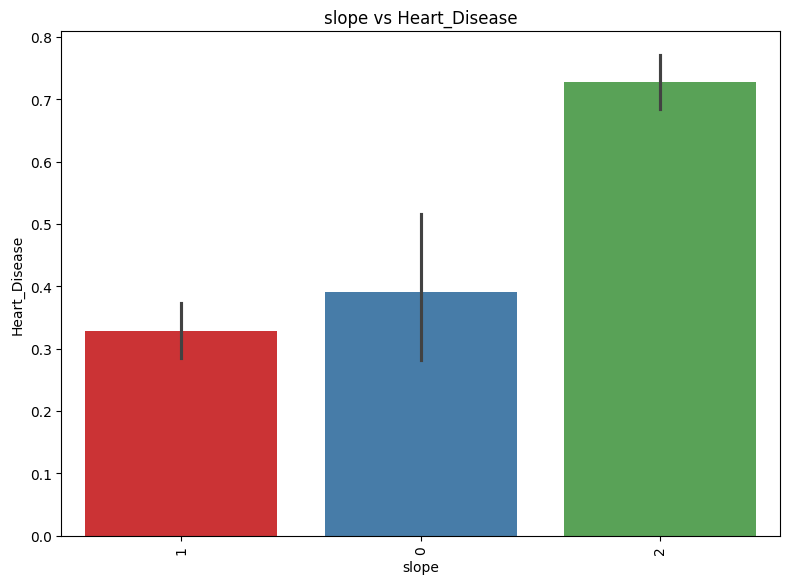

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/3626188247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)


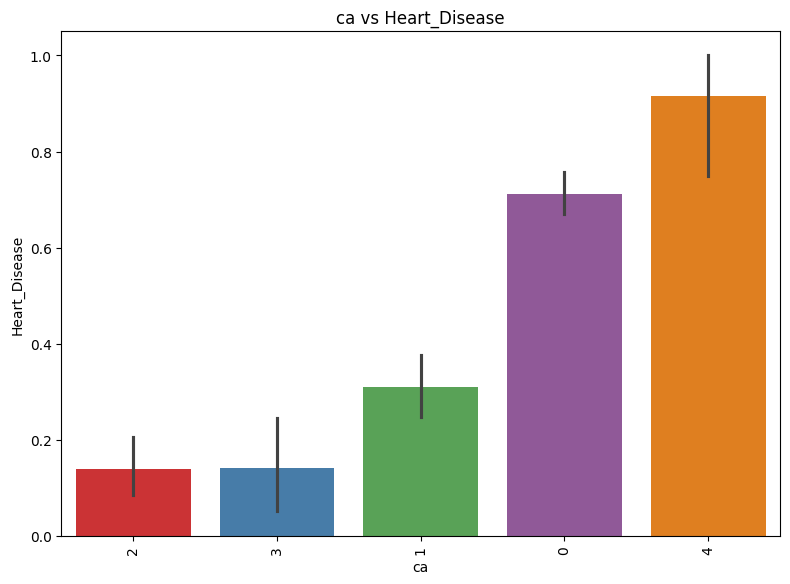

/var/folders/d4/wnzjw0sd4_dcj9dkwdjk6b180000gn/T/ipykernel_6648/3626188247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)


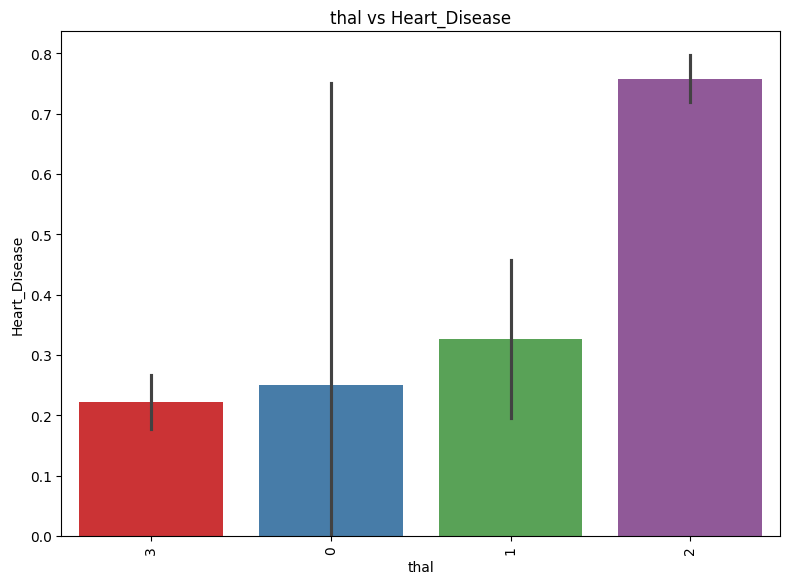

In [78]:
for col in num_cols:
    plt.figure(figsize=(8, 6))
    # Sort by mean heart for that column
    order = df.groupby(col)['Heart_Disease'].mean().sort_values(ascending=True).index
    sns.barplot(x=df[col], y=df["Heart_Disease"],palette='Set1',order=order)   
    plt.title(f'{col} vs Heart_Disease')
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.show()

# TRAIN AND SPLIT TEST


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay


In [80]:
#Seperating target 
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']

#using standardscalar()
# .....the mean becomes 0 and the standard deviation becomes 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        75
           1       0.81      0.91      0.86        89

    accuracy                           0.84       164
   macro avg       0.84      0.83      0.83       164
weighted avg       0.84      0.84      0.83       164

ROC-AUC: 0.9300374531835206


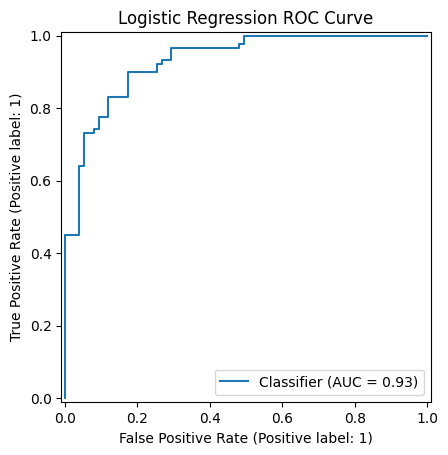

In [82]:
lr_model = LogisticRegression()

#fit the model
lr_model.fit(X_train, y_train)

#make predictions
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

RocCurveDisplay.from_predictions(y_test, y_prob_lr)
plt.title("Logistic Regression ROC Curve")
plt.show()

 Random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

Random forest results
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        75
           1       0.98      0.94      0.96        89

    accuracy                           0.96       164
   macro avg       0.96      0.96      0.96       164
weighted avg       0.96      0.96      0.96       164

ROC-AUC: 0.9971535580524344


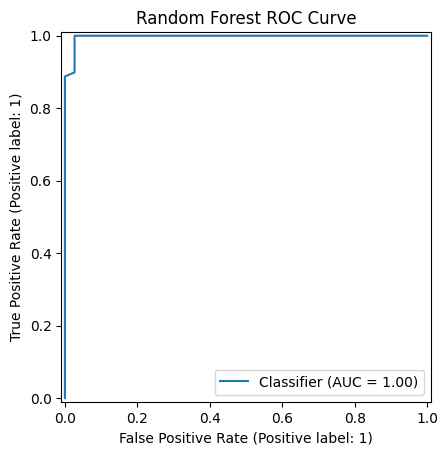

In [84]:
rf_model = RandomForestClassifier()

#fit the model
rf_model.fit(X_train, y_train)

#make predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random forest results")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

RocCurveDisplay.from_predictions(y_test, y_prob_rf)
plt.title("Random Forest ROC Curve")
plt.show()


Feature importance for random forest

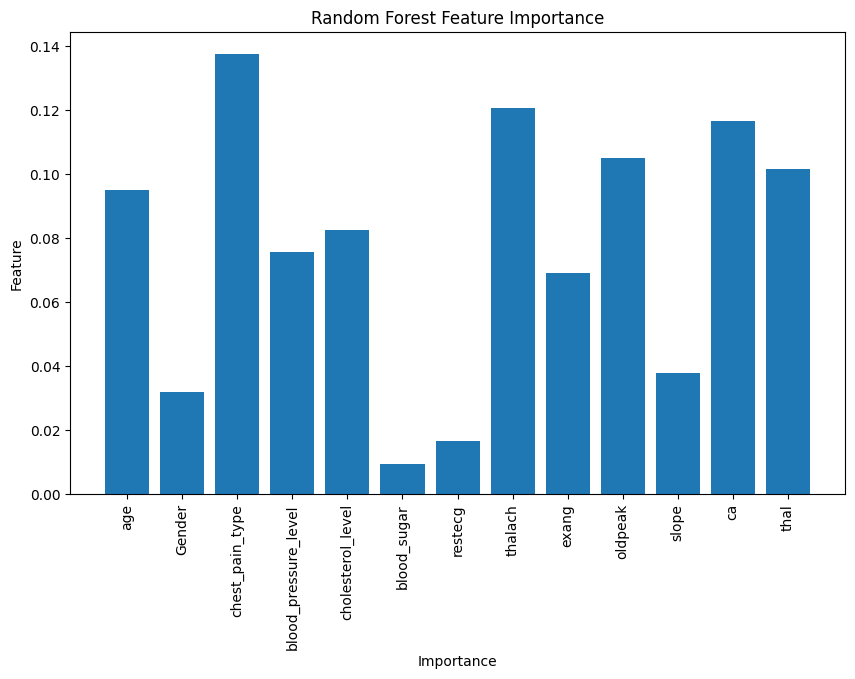

In [85]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=90)
plt.show()

# Comparing models

Random forest vs logistic regression (AUC Comparision)

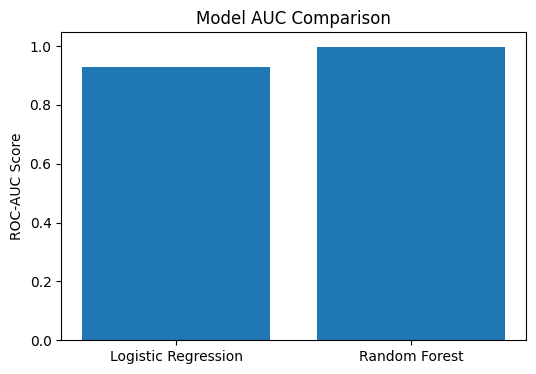

In [87]:
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)


plt.figure(figsize=(6,4))
plt.bar(["Logistic Regression", "Random Forest"], [auc_lr, auc_rf])
plt.ylabel("ROC-AUC Score")
plt.title("Model AUC Comparison")
plt.show()


# Load test data for submission

In [ ]:
test_df = pd.read_csv("test.csv")  

# Saving ids becsuse it is needed in the final submission file
test_ids = test_df["ID"]

# Drop id..the model does not need id to predict
test_df = test_df.drop("ID", axis=1)

Apply same label encoding

the cat_cols in train_csv were converted to nums using label encoder...so
we convert test.csv in the same way

In [ ]:
for col in cat_cols:
    test_df[col] = encoders[col].transform(test_df[col])

In [ ]:
#scale test data...because training data was scaled
test_scaled = scaler.transform(test_df)


Using random forest- better accuracy

In [ ]:
test_pred = rf_model.predict(test_scaled)

create submission file

In [ ]:
submission = pd.DataFrame({
    "id": test_ids,
    "Heart_Disease": test_pred})

submission.to_csv("submission.csv", index=False)

print("created successfully")

created successfully
